In [1]:
import numpy as np
import pandas as pd

In [2]:
target = pd.read_csv("proc_data/target.csv", parse_dates=['dt'])
target.head()

,dt,value
0,1999-01-01 00:00:00,0
1,1999-01-01 03:00:00,2
2,1999-01-01 06:00:00,1
3,1999-01-01 09:00:00,2
4,1999-01-01 12:00:00,2


In [3]:
df = target.rename(columns={"dt":"ds", "value":"y"})
df.head()

,ds,y
0,1999-01-01 00:00:00,0
1,1999-01-01 03:00:00,2
2,1999-01-01 06:00:00,1
3,1999-01-01 09:00:00,2
4,1999-01-01 12:00:00,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43832 entries, 0 to 43831
Data columns (total 2 columns):
ds    43832 non-null datetime64[ns]
y     43832 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 685.0 KB


In [5]:
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [6]:
prop = Prophet()
prop.fit(df)

In [7]:
future = prop.make_future_dataframe(periods=365)
future.tail()

,ds
44192,2014-12-27 21:00:00
44193,2014-12-28 21:00:00
44194,2014-12-29 21:00:00
44195,2014-12-30 21:00:00
44196,2014-12-31 21:00:00


In [8]:
forecast = prop.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
44192,2014-12-27 21:00:00,1.697835,-0.217213,2.797257,1.450490,1.981161,-0.345095,-0.345095,-0.345095,0.105237,...,0.003738,0.003738,0.003738,-0.454070,-0.454070,-0.454070,0.0,0.0,0.0,1.352740
44193,2014-12-28 21:00:00,1.697979,-0.147024,2.852027,1.449508,1.982486,-0.349424,-0.349424,-0.349424,0.105237,...,-0.001787,-0.001787,-0.001787,-0.452873,-0.452873,-0.452873,0.0,0.0,0.0,1.348555
44194,2014-12-29 21:00:00,1.698122,-0.277455,2.923111,1.448140,1.983812,-0.330182,-0.330182,-0.330182,0.105237,...,0.014738,0.014738,0.014738,-0.450157,-0.450157,-0.450157,0.0,0.0,0.0,1.367940
44195,2014-12-30 21:00:00,1.698266,-0.230393,2.948148,1.446772,1.985138,-0.314971,-0.314971,-0.314971,0.105237,...,0.025622,0.025622,0.025622,-0.445830,-0.445830,-0.445830,0.0,0.0,0.0,1.383295
44196,2014-12-31 21:00:00,1.698409,-0.292915,2.984490,1.445740,1.986463,-0.337837,-0.337837,-0.337837,0.105237,...,-0.003245,-0.003245,-0.003245,-0.439829,-0.439829,-0.439829,0.0,0.0,0.0,1.360572


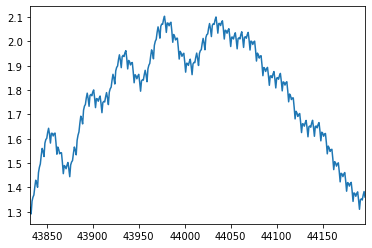

In [9]:
forecast.iloc[-365:, :].yhat.plot()